## EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv("clean_df.csv")

In [3]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-bined,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [4]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration turbo
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,...,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,...,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,...,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,...,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,...,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,...,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,...,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [5]:
drive_wheels_counts=df["drive-wheels"].value_counts()
drive_wheels_counts

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

#### Group by method
We use the groupby() method to show relationship between variables to the one being predicred
In a startoff we first selecta ll the columns we want to use in the group by then run the groupby() method

In [6]:
#the direct method to you can decide to assign variables to the data
df[["drive-wheels","body-style","price"]].groupby(["drive-wheels","body-style"],as_index=False).mean()

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [7]:
#Here we are going to group the test-column by wheels and body type and find the mean
#price associated for each group of data
#The as_index is used to determine whether the column data will serve as index
#can be set to true or false as demonsrated above as False and here as True. 
Test_Columns=df[["drive-wheels","body-style","price"]]
GroupBy_Result=Test_Columns.groupby(["drive-wheels","body-style"], as_index=False).mean()
GroupBy_Result

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


From the table we can see the highest price average for a vehicle is 24,202 which is the rwd wagons.
The least priced on average is the 4wd hatchback going for average 7603

#### Pivot table
We create a pivot table to make the visualization of the data in the groupby table easier.

In [8]:
# we use the panda pivot method you set whichdata is to be dispalyed on the columns and rows
#the index is the rows while the columns is the columns
#here is shpw the long method
df[["drive-wheels","body-style","price"]].groupby(["drive-wheels","body-style"],as_index=False).mean().pivot(index="drive-wheels", columns="body-style")

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [9]:
#short method
#i changed the as_index to have the drive wheels and bosy style as columns and not index
Pivot_Table=GroupBy_Result.pivot(index="drive-wheels", columns="body-style")
Pivot_Table

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

#### Heat maps
Another way of representing pivot tables
Heat maps assign color intesity based on the data values.
Good way to plot target variable against multiple influencing variables

In [10]:
#in order to plot the heat maps we are going to use the pcolor method of matplotlib
# we assign the pivot table and then select the color scheme to us

<AxesSubplot:xlabel='None-body-style', ylabel='drive-wheels'>

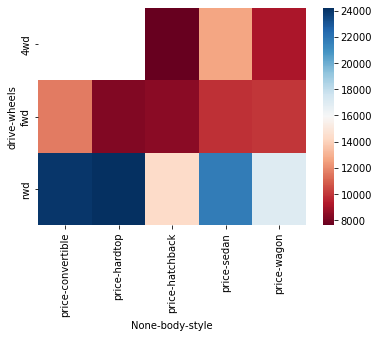

In [11]:
sns.heatmap(Pivot_Table,cmap='RdBu')

#### ANOVA

The ANOVA (Analysis of variance) uses categorical data to determine interdependence to numerical data
So to perform ANOVA test you measure the variance of the original data
Measure the variance of the model data and then calculate the ratio of the explained cariance to the unexplained. This forms the t-test which shows whether there is any significant correlation between the catagorical and numerical values in the data

P-value shows whether the obtained value is statistically significant and and is used to either accept or reject the null Hypothesis.

F value is the variation between groups means/variation of mean within indiviadual groups. f(b,w)

Large F value implies a large difference between the variables. 


In [12]:
#So lets analyze whether there is any correlation between car make and the price. Does the make affect price
#this is done using an ANOVA test. Car make data is categorical while price is numerical
#first we select the columns then group by make
#then finally perform the anova and obtain t and p values
Anova_Data=df[["make","price"]]
Anova_GroupBy=Anova_Data.groupby(["make"])
#the anova test is done using the f_oneway fuction of the scipy method
#lets fo an anove between honda and subaru these are covered in the group make
AnovaResults=stats.f_oneway(Anova_GroupBy.get_group("honda")["price"],Anova_GroupBy.get_group("subaru")["price"])
AnovaResults

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

From the above anova test results we can see that the prices between honda and subaru are not significantly different because the f value is below 1.
Next we try to do an anova between the price of the honda and the jaguar

In [13]:
AnovaResults2=stats.f_oneway(Anova_GroupBy.get_group("honda")["price"],Anova_GroupBy.get_group("jaguar")["price"])
AnovaResults2

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

Here we can see that thre is a very significant diffrence in the prices of the honda and the jagaur.
The t value is 401 while the p value is 1.05

#### Correlation

Shows interdependence between variables in a data set

(0.0, 53145.55903842719)

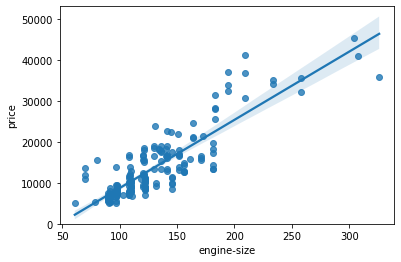

In [14]:
#lets check the correlation between engine size and price
sns.regplot(x="engine-size",y="price", data=df)
pyplot.ylim(0,)

(0.0, 47716.6968459697)

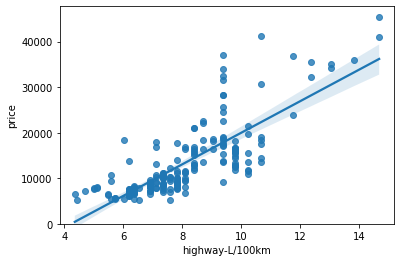

In [15]:
#lets check correlation between highway L/km and price
sns.regplot(x="highway-L/100km",y="price", data=df)
pyplot.ylim(0,)

Shows a strong positive correlation as between the two

(0.0, 47414.1)

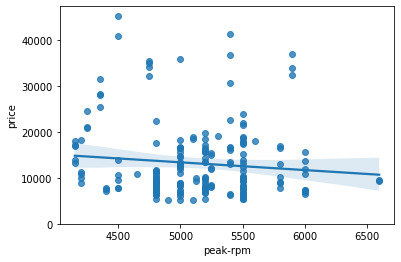

In [16]:
#we take a look ar the peak rpm and price
sns.regplot(x="peak-rpm",y="price", data=df)
pyplot.ylim(0,)

There is a weak correlation between peak rpm and the price. Increase in peak rpm doesnt correlate to increase in the price and threfore doesnt serve as determinant in price prediction

#### Pearson correlation

Gives two values, correlation coefficient and p-value
The coefficent value signifies the degree of relationship whether positive or negative or none
The p-value shows certainity in the relationship.

In [17]:
#lets look at the correlation between horsepower and price using the pearsonr method of the scipy stats module

P_Coef, P_pvalue=stats.pearsonr(df["horsepower"],df["price"])

In [18]:
P_Coef

0.8096068016571054

In [19]:
P_pvalue

6.273536270650504e-48

As we can see the correlation is strong positive correlation between the two variables
The p value is greatly below 0.001 threfore the certainity level of the relationship is high

#### Correlation heat map for all variables